# Homework 2 Problem 1

In [235]:
import numpy as np
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import sproot
import sys

In [236]:
with open('raman.txt', 'r') as file:
    lines = file.readlines()
    
wavenumbers = []
intensities = []

for line in lines:
    values = line.split()
    if len(values) == 2:
        wavenumbers.append(float(values[0]))
        intensities.append(float(values[1]))

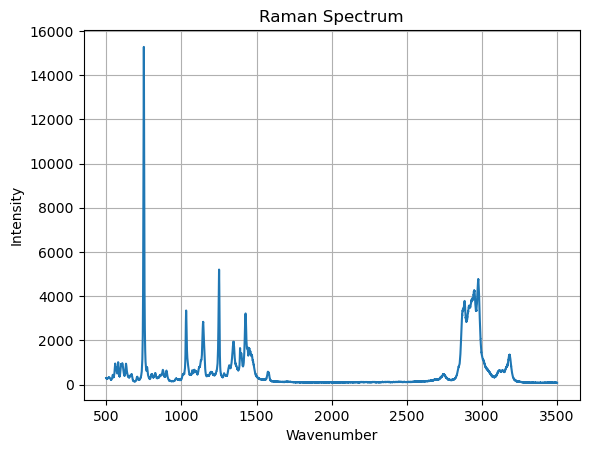

In [237]:
plt.figure()
plt.plot(wavenumbers, intensities)
plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.title('Raman Spectrum')
plt.grid(True)
plt.show()

### 1a: Print the wavenumber estimates for the eight largest spectral peak to STDOUT sorted by magnitude (largest first).

In [238]:
# Finds indices of peaks in the raw spectrum
peaks_indices, _ = find_peaks(intensities, height=3000)

# Define the width for regions of interest
n1 = 10  # Adjust as needed

# Initialize a dictionary to store peak wavenumbers and intensities
peak_data = {}


In [239]:
# Loop through detected peaks
for peak_index in peaks_indices:
    peak_wavenumber = wavenumbers[peak_index]
    
    # Define the region of interest around the peak
    region_start = peak_wavenumber - n1
    region_end = peak_wavenumber + n1

    # Filter data within the region of interest
    region_wavenumbers = []
    region_intensities = []
    
    for i, wavenumber in enumerate(wavenumbers):
        if wavenumber >= region_start and wavenumber <= region_end:
            region_wavenumbers.append(wavenumber)
            region_intensities.append(intensities[i])
    
    # Make a spline for region of interest
    spline = UnivariateSpline(region_wavenumbers, region_intensities, s=0)
    
    # Calculate the derivative of the spline
    derivative = spline.derivative()
    
    # Find zero-crossings of the derivative (wavenumbers)
    zero_crossings = []
    for i in range(1, len(region_wavenumbers) - 1):
        if derivative(region_wavenumbers[i - 1]) * derivative(region_wavenumbers[i + 1]) < 0:
            zero_crossings.append(int(region_wavenumbers[i]))
        
    # Select the wavenumber with the maximum intensity within the region
    if zero_crossings:
        # Calculate the intensity values at zero-crossings
        zero_crossing_intensities = [spline(zc) for zc in zero_crossings]

        # Find the index of the maximum intensity among zero-crossings
        max_intensity_index = np.argmax(zero_crossing_intensities)
        

        # Check if the index is within a valid range
        if max_intensity_index < len(zero_crossings):
            # Retrieve the actual wavenumber corresponding to the maximum intensity found within the region
            max_intensity = zero_crossing_intensities[max_intensity_index]
        else:
            # Handle the case where the index is out of range
            max_intensity = None
    else:
        # If no zero-crossings found, use the peak wavenumber
        max_intensity = None
        
    # Store the peak data in the dictionary
    max_intensity_denumpy = max_intensity.item()
    peak_data[peak_wavenumber] = max_intensity_denumpy

In [240]:
print(peak_data)

{750.42657: 15252.386730038184, 1031.9596: 3190.9652608951524, 1250.886: 5210.959532294003, 1426.4995: 3210.837369654681, 1427.287: 3210.837369654681, 2868.4211: 3429.9691759982597, 2869.2085: 3436.1351792076352, 2871.571: 3488.0436611904056, 2872.7524: 3596.769833867381, 2873.9336: 3596.771518952217, 2875.1147: 3770.0027218498776, 2875.9023: 3769.9385510472757, 2877.4773: 3770.007071947297, 2878.2649: 3835.131690726228, 2879.0525: 3770.0070479508868, 2884.5649: 3770.007043444437, 2885.7461: 3770.007043444393, 2888.5024: 3770.00704298666, 2892.0461: 3770.0169383504963, 2902.6775: 3495.0194234709647, 2904.6462: 3530.2798292610687, 2906.2212: 3548.078081354531, 2907.7964: 3547.922154660581, 2910.5525: 3559.7032256600087, 2911.7339: 3559.9820722326626, 2913.3088: 3559.9841903887564, 2914.49: 3559.9841932947766, 2915.2776: 3568.480090537639, 2916.4587: 3568.4345376635565, 2917.2463: 3650.9964552388064, 2918.8213: 3730.936715149252, 2920.0027: 3723.262252216218, 2920.79: 3796.8955960806607,

In [241]:
# Sort the peak_data dictionary by values in descending order
sorted_peak_data = sorted(peak_data.items(), key=lambda x: x[1], reverse=True)
top_eight_peaks_wavenumber = []
top_eight_peaks_intensity = []


# Print the wavenumber estimates for the eight largest spectral peaks (keys from the sorted dictionary)
for i, (key, value) in enumerate(sorted_peak_data[:8], start=1):
    print(f"Peak {i}: Wavenumber={key}, Intensity={value}")
    top_eight_peaks_wavenumber.append(key)
    top_eight_peaks_intensity.append(value)

Peak 1: Wavenumber=750.42657, Intensity=15252.386730038184
Peak 2: Wavenumber=1250.886, Intensity=5210.959532294003
Peak 3: Wavenumber=2977.8843, Intensity=4746.200620252022
Peak 4: Wavenumber=2974.7341, Intensity=4746.2006202492175
Peak 5: Wavenumber=2975.9155, Intensity=4746.200620249216
Peak 6: Wavenumber=2977.0967, Intensity=4746.200620249191
Peak 7: Wavenumber=2962.5278, Intensity=4387.188883774877
Peak 8: Wavenumber=2939.2964, Intensity=4263.546821129625


### 1b Create a figure that shows the Raman data (intensity vs. wavenumber) and mark each of the maximum intensity values.

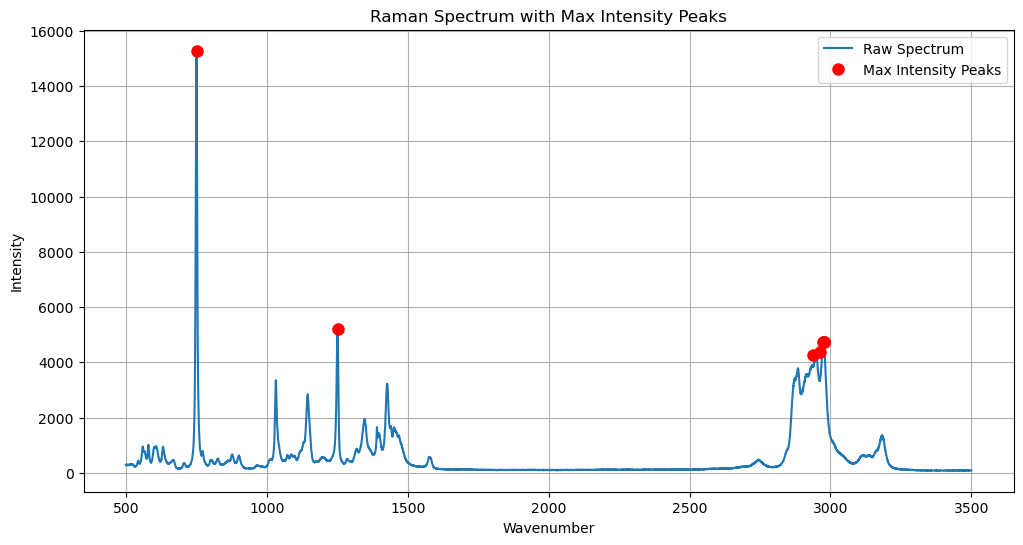

In [242]:
# Create a figure for the Raman data with maximum intensity values marked
plt.figure(figsize=(12, 6))
plt.plot(wavenumbers, intensities, label='Raw Spectrum')

# Plot the last 8 peak wavenumbers with their corresponding max intensity values
plt.plot(top_eight_peaks_wavenumber, top_eight_peaks_intensity, 'ro', markersize=8, label='Max Intensity Peaks')


plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.title('Raman Spectrum with Max Intensity Peaks')
plt.legend()
plt.grid(True)
plt.show()

### 1c Produce a “zoomed-in” figure for the “regions of interest” corresponding to the four largest peaks. Plot the raw spectral data and overlay your interpolating function. Use a marker to show the wavenumber with maximal intensity.

In [293]:
four_largest_wavenumber = top_eight_peaks_wavenumber[0:4]
four_largest_intensity = top_eight_peaks_intensity[0:4]

In [287]:
def generate_graph(wavenum, inten):
    n1 = 10
    # Define the region of interest around the peak
    region_start = wavenum - n1
    region_end = inten + n1

    # Filter data within the region of interest
    region_wavenumbers = []
    region_intensities = []
    
    
    for i, wavenumber in enumerate(wavenumbers):
        if wavenumber >= region_start and wavenumber <= region_end:
            region_wavenumbers.append(wavenumber)
            region_intensities.append(intensities[i])
            
    max_ind = region_intensities.index(max(region_intensities))
    
    
    spline = UnivariateSpline(region_wavenumbers, region_intensities)
    
    x_spline = np.linspace(min(region_wavenumbers), max(region_wavenumbers), 10000)
    # Evaluate the spline at the x-values
    y_spline = spline(x_spline)
    
    plt.title("Zoomed-in region of interest")
    plt.xlabel("Wavenumber")
    plt.ylabel("Intensity")
    plt.plot(region_wavenumbers, region_intensities, "g*", label = "X and Y data")
    plt.plot(region_wavenumbers[max_ind], region_intensities[max_ind], "r+", markersize = 10, label = "Peak")
    plt.xlim(wavenum - n1, wavenum + n1)  # Set x-axis limits
    #plt.ylim(4, 7)

    plt.plot(x_spline, y_spline, label='Spline Curve', color='blue')
    
    plt.legend()
    plt.show()

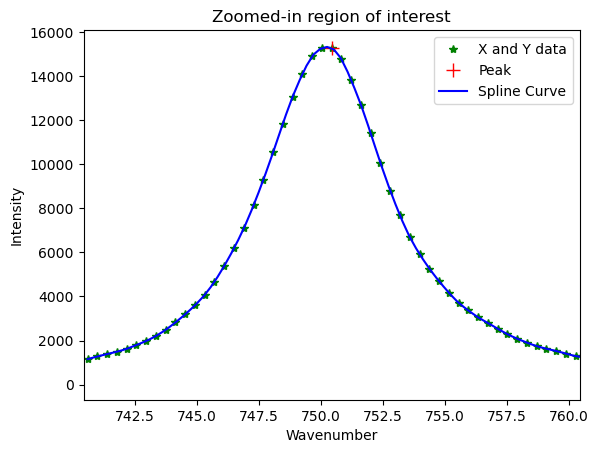

In [288]:
generate_graph(four_largest_wavenumber[0], four_largest_intensity[0])

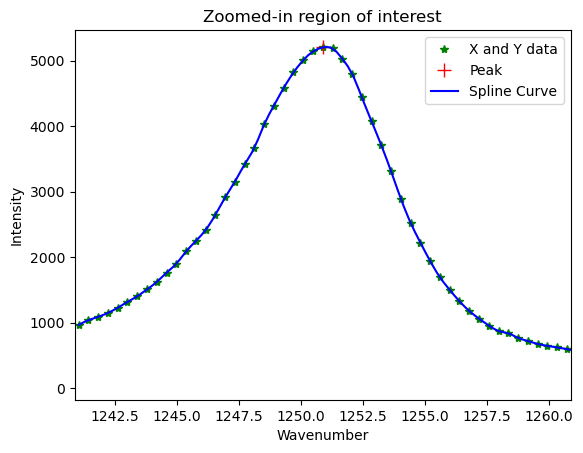

In [289]:
generate_graph(four_largest_wavenumber[1], four_largest_intensity[1])

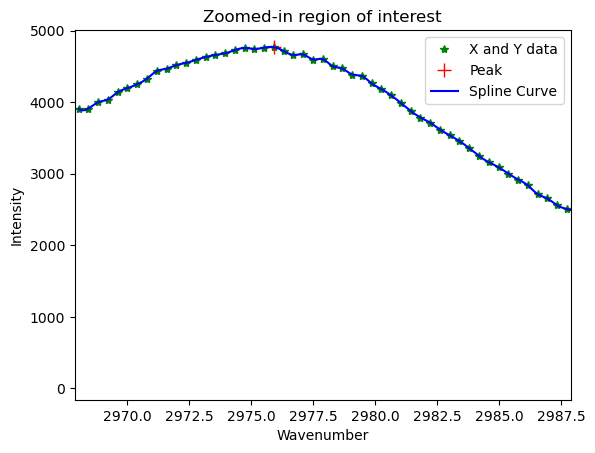

In [290]:
generate_graph(four_largest_wavenumber[2], four_largest_intensity[2])

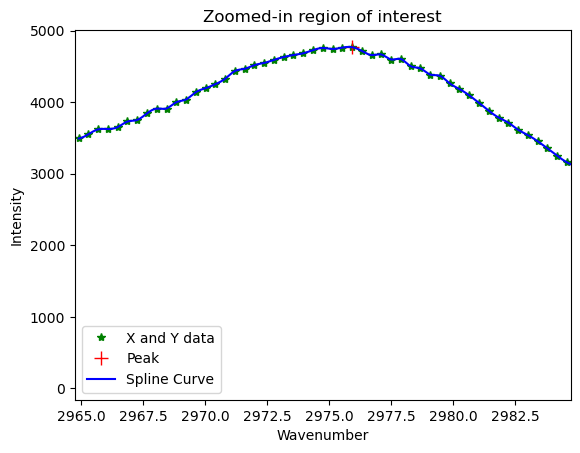

In [294]:
generate_graph(four_largest_wavenumber[3], four_largest_intensity[3])